# Basic Neural Networks

# Brett Naul
# UC Berkeley

# About me
## - `cesium` library for machine learning w/ time series data
- https://cesium.ml
- Come talk to me about your time series data

## - PTF/ZTF Marshal 2.0
## - Deep learning / neural networks for time series data

# Why neural networks?
## - General set of models for solving wide variety of problems
## - State of the art for many machine learning tasks
- Computer vision
- Speech recognition
- Natural language processing
- Probably something else cool since the beginning of this talk

## - Hype hype hype

# (Extremely) Brief history
## - Inspired by neurobiology, can trace back to the 1940s(!)
<img width="40%" src="http://www.webpages.ttu.edu/dleverin/neural_network/fig_3p6_neurons_NEURON4.jpg">
<img width="70%" src="https://www.evernote.com/l/AUVUbm0I38pMWbUhfC0VUZv7qxxguDOy64QB/image.png">


# (Extremely) Brief history
## - For a long time, thought to have only a few niche applications
- Handwritten recognition (zip codes)

## - LeNet
![](http://eblearn.sourceforge.net/lib/exe/lenet5.png)

# (Extremely) Brief history
## - Recent (2010-?) explosion in popularity
- Increases in volume of data
- Computing power / GPU computing
- Better optimization procedures

## - ImageNet: rapid increase in accuracy
<img src="https://qph.ec.quoracdn.net/main-qimg-9bf8dcdb5198382dc06a7aafbc5c40bc?convert_to_webp=true">

# Simple neural network
## - "Perceptron"
<img width="60%" src="perceptron.png">
## - Graph structure: nodes represent values, edges functions
## - Just a specific structure for defining a function $f(\mathbf{x}) \rightarrow \mathbf{y}$

# Simple(st) neural network
## - Linear regression
- Let edges represent linear functions
![](https://jalammar.github.io/images/NNs_bias_2.png)
- Equivalent to linear regression model

# Simple(st) neural network
## - Linear regression
- Let edges represent linear functions
![](https://jalammar.github.io/images/NNs_2_variables.png)
- Equivalent to linear regression model

# Demo
## [http://jalammar.github.io/visual-interactive-guide-basics-neural-networks/](http://jalammar.github.io/visual-interactive-guide-basics-neural-networks/#train-your-dragon)

# Simple neural network: linear classification
## - Edges still linear functions
## - Apply sigmoid function to output
![](http://computing.dcu.ie/~humphrys/Notes/Neural/Bitmaps/sigmoid.gif)

## - Logistic regression!

# Simple neural network: multiclass classification
## - Edges still linear functions
## - Multiple outputs
## - Apply softmax function (normalized sigmoid) to output
![](http://jalammar.github.io/images/softmax-regression-scalargraph.png)

## - Multiclass classification!

# Activation functions
## - Biological motivation
## - Practical significance: introduce non-linearities
## - Universal representation theorem
## - Different choices: sigmoid, tanh, ReLU

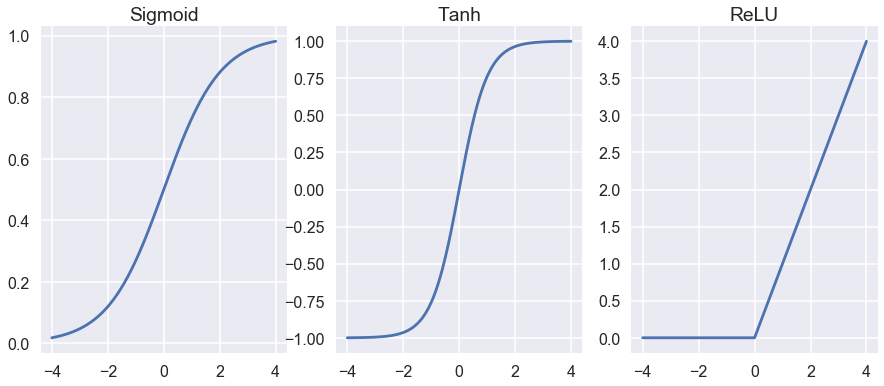

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

def sigmoid(x): return 1 / (1 + np.exp(-x))

fig, ax = plt.subplots(1, 3, figsize=(15, 6))
x = np.linspace(-4, 4, 501)
ax[0].plot(x, sigmoid(x)); ax[0].set_title("Sigmoid")
ax[1].plot(x, np.tanh(x)); ax[1].set_title("Tanh")
ax[2].plot(x, np.maximum(x, 0)); ax[2].set_title("ReLU");

# Multiple layers
<img width="60%" src="mlperceptron.png">
## - Non-linear activation functions allow representation of complex functions
## - More layers -> more complexity
    

# Training neural networks
## - Input training data + loss function
![](https://jalammar.github.io/images/NNs_2_variables.png)
## - Single-layer network: explicit functional form
## - Minimize loss in closed form (as function of weights+bias)


# Training neural networks: multiple layers
## - Deeper networks: can't compute optimal weights in closed form
<img width="60%" src="mlperceptron.png">
## - Alternative: numerical optimization
- Make initial guess
- Find direction in which loss is decreasing (compute gradient)
- Take a step in that direction
- Repeat

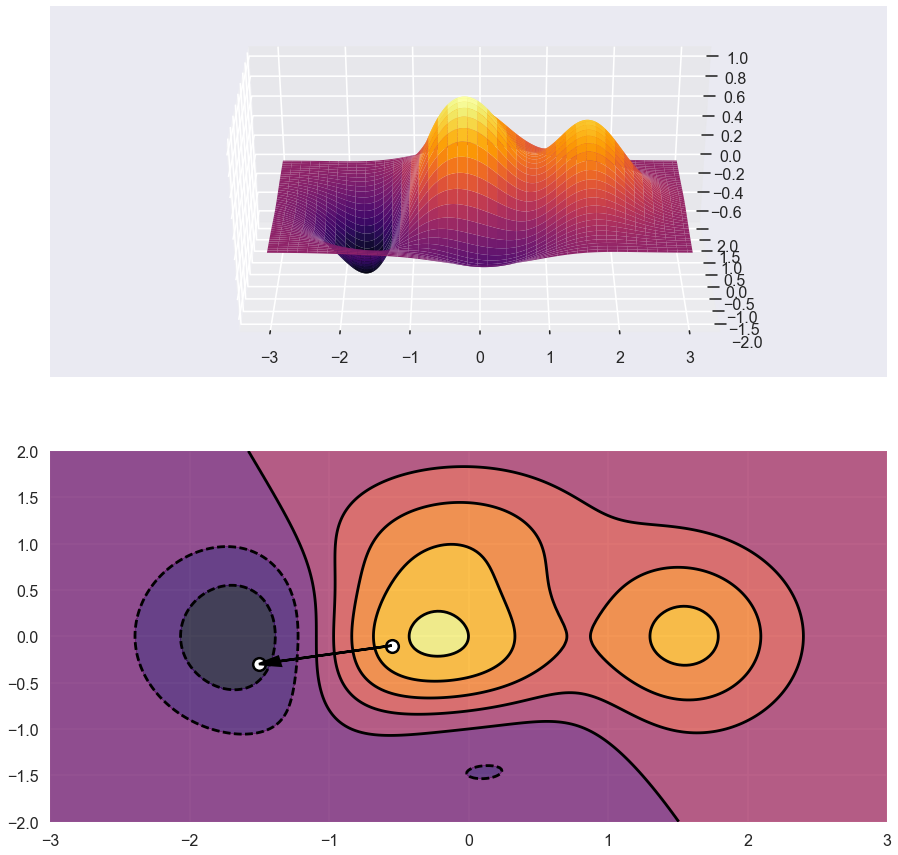

In [2]:
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

def df(x, y, h=1e-3):
    return np.r_[(f(x + h, y) - f(x, y)) / h,
                 (f(x, y + h) - f(x, y)) / h]

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-2, 2, n)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2, 1, 1, projection='3d', azim=-90)
ax.plot_surface(X, Y, f(X, Y), cmap='inferno')

x0 = -0.55; y0 = -0.1
step = 1.0
ax = fig.add_subplot(2, 1, 2)
plt.contourf(X, Y, f(X, Y), V=12, alpha=0.75, cmap='inferno')
plt.contour(X, Y, f(X, Y), V=12, colors='black', linewidth=0.5)
ax.scatter(x0, y0, s=160., c='w', edgecolors='k', linewidths=2.5)
ax.scatter(x0 - step * df(x0, y0)[0], y0 - step * df(x0, y0)[1],
            s=160., c='w', edgecolors='k', linewidths=2.5)
ax.arrow(x0, y0, *(-step * df(x0, y0)), linewidth=2.5, head_width=0.1, color='k',
          length_includes_head=True);

# Training neural networks: multiple layers
## - For complex networks, even writing down the gradient is hard
## - Key idea: backpropagation
## - Use chain rule to compute derivatives one edge at a time
![](https://kratzert.github.io/images/bn_backpass/BNcircuit.png)


# Training neural networks: multiple layers
## - "Forward pass": compute $\mathbf{y}=f(\mathbf{x})$ by traversing graph starting from input
## - "Backward pass": compute $\frac{\partial \mathbf{y}}{\partial \mathbf{x}} = \nabla f(\mathbf{x})$ by traversing graph starting from output and applying chain rule at each step

![](https://kratzert.github.io/images/bn_backpass/BNcircuit.png)

# Backpropagation issues
## - Frameworks such as Tensorflow, Theano, etc. mostly eliminate the need to manually compute gradients
## - Still important to understand basics for debugging
- Andrej Karpathy: "leaky abstraction"

## - Vanishing gradients
## - Exploding gradients

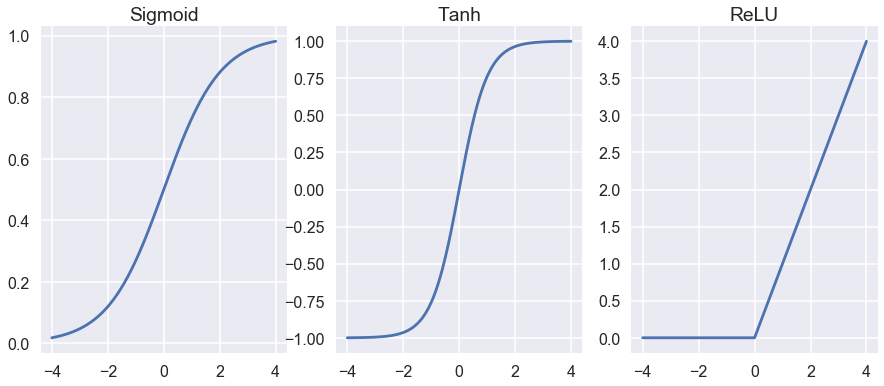

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
x = np.linspace(-4, 4, 501)
ax[0].plot(x, sigmoid(x)); ax[0].set_title("Sigmoid")
ax[1].plot(x, np.tanh(x)); ax[1].set_title("Tanh")
ax[2].plot(x, np.maximum(x, 0)); ax[2].set_title("ReLU");

# Demo
## [http://playground.tensorflow.org](http://playground.tensorflow.org/#dataset=spiral)

# Exercise time!

# "Advanced" neural networks
## - Beyond perceptrons...
<img width="60%" src="mlperceptron.png">

# Types of neural networks
## - "Neural Network Zoo" (Asimov Institute)
<img src="http://www.asimovinstitute.org/wp-content/uploads/2016/09/neuralnetworks.png">


# Hype

- "The Great AI Awakening" (NYTimes 12/2016) https://www.nytimes.com/2016/12/14/magazine/the-great-ai-awakening.html

- "Deep learning" (Nature 2015) http://www.nature.com/nature/journal/v521/n7553/full/nature14539.html

- "Deep learning algorithm does as well as dermatologists in identifying skin cancer" (yesterday!) http://news.stanford.edu/2017/01/25/artificial-intelligence-used-identify-skin-cancer/

# Hype...?
- *"Creating a deep learning model is, ironically, a highly manual process. Training a model takes a long time, and even for the top practitioners, it is a hit or miss affair where you don’t know whether it will work until the end. No mature tools exist to ensure models train successfully, or to ensure that the original set up is done appropriately for the data."* -- J. Howard (Fast.ai; http://www.fast.ai/2016/10/07/fastai-launch/)

# Convolutional neural networks

## - Convolution: sliding window product of two functions(?)
## - Not even remotely a new idea: signal processing, differential equations, etc.
## - Two-dimensional convolution: move a filter around an image and compute activations at each location
## - Preserves local structure of image

# Convolutional neural networks
 
<img src="http://cs231n.github.io/assets/cnn/cnn.jpeg">

<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg">

# Convolutional filter demo

## [http://setosa.io/ev/image-kernels](http://setosa.io/ev/image-kernels)

# Convolutional neural networks
## - Convolutional filters for image processing aren't new either
## - Key idea of deep learning: learn filters instead of hand-coding
## - Humans not as good at designing features as we'd like to believe...

# Convolutional neural networks
## - Learned filters (AlexNet):
<div>
<img width="59%" src="http://cs231n.github.io/assets/cnnvis/filt1.jpeg">
</div>

# Convolutional neural networks
## - Good: small number of parameters can identify complicated patterns
## - Bad: output of convolutional network is large (image size x # of filters)
## - (One) solution: pooling
<img src="http://cs231n.github.io/assets/cnn/pool.jpeg" width="40%">
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" width="40%">

# Convolutional neural networks
## Common approach: convolutional -> pooling -> repeat -> fully connected
<img src="http://cs231n.github.io/assets/cnn/pool.jpeg" width="40%">
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" width="40%">

# Example: VGGNet

```
INPUT: [224x224x3]        memory:  224*224*3=150K   weights: 0
CONV3-64: [224x224x64]  memory:  224*224*64=3.2M   weights: (3*3*3)*64 = 1,728
CONV3-64: [224x224x64]  memory:  224*224*64=3.2M   weights: (3*3*64)*64 = 36,864
POOL2: [112x112x64]  memory:  112*112*64=800K   weights: 0
CONV3-128: [112x112x128]  memory:  112*112*128=1.6M   weights: (3*3*64)*128 = 73,728
CONV3-128: [112x112x128]  memory:  112*112*128=1.6M   weights: (3*3*128)*128 = 147,456
POOL2: [56x56x128]  memory:  56*56*128=400K   weights: 0
CONV3-256: [56x56x256]  memory:  56*56*256=800K   weights: (3*3*128)*256 = 294,912
CONV3-256: [56x56x256]  memory:  56*56*256=800K   weights: (3*3*256)*256 = 589,824
CONV3-256: [56x56x256]  memory:  56*56*256=800K   weights: (3*3*256)*256 = 589,824
POOL2: [28x28x256]  memory:  28*28*256=200K   weights: 0
CONV3-512: [28x28x512]  memory:  28*28*512=400K   weights: (3*3*256)*512 = 1,179,648
CONV3-512: [28x28x512]  memory:  28*28*512=400K   weights: (3*3*512)*512 = 2,359,296
CONV3-512: [28x28x512]  memory:  28*28*512=400K   weights: (3*3*512)*512 = 2,359,296
POOL2: [14x14x512]  memory:  14*14*512=100K   weights: 0
CONV3-512: [14x14x512]  memory:  14*14*512=100K   weights: (3*3*512)*512 = 2,359,296
CONV3-512: [14x14x512]  memory:  14*14*512=100K   weights: (3*3*512)*512 = 2,359,296
CONV3-512: [14x14x512]  memory:  14*14*512=100K   weights: (3*3*512)*512 = 2,359,296
POOL2: [7x7x512]  memory:  7*7*512=25K  weights: 0
FC: [1x1x4096]  memory:  4096  weights: 7*7*512*4096 = 102,760,448
FC: [1x1x4096]  memory:  4096  weights: 4096*4096 = 16,777,216
FC: [1x1x1000]  memory:  1000 weights: 4096*1000 = 4,096,000

TOTAL memory: 24M * 4 bytes ~= 93MB / image (only forward! ~*2 for bwd)
TOTAL params: 138M parameters
```

# Recurrent neural networks
## - Mostly discussed image data so far
## - What about other types? e.g. sequence data?
![](http://karpathy.github.io/assets/rnn/diags.jpeg)

# Recurrent neural networks
## - Designed for processing sequence data
## - Loop through input sequence 
## - At each step:
- Compute function of input + neuron internal state
- Update internal state
![](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)

# Recurrent neural networks
## - Cell state gets updated at each step
## - Long term dependencies are problematic
## - Various other types of network designed to mitigate this (LSTM, GRU, etc.)
![](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)

For details see http://colah.github.io/posts/2015-08-Understanding-LSTMs/.

# Recurrent neural networks
## - Excellent performance for text analysis

![](http://karpathy.github.io/assets/rnn/pane1.png)

"Unreasonable Effectiveness of Recurrent Neural Networks" http://karpathy.github.io/2015/05/21/rnn-effectiveness/

# Deep learning frameworks

## - Python(-compatible)
- Tensorflow (Google)
- Theano (Université de Montréal)
- CNTK (Microsoft)
- MXNet (Amazon+Baidu+...)
- Keras (frontend for TensorFlow + Theano
- Caffe (UC Berkeley)

## - Lua(...?)
- Torch (Facebook)

# Deep learning frameworks
   
<img src="https://pbs.twimg.com/media/Cp6UW13UsAAQWWh.jpg" width="75%">
Source: https://twitter.com/fchollet/status/765212287531495424/photo/1?ref_src=twsrc%5Etfw

# Deep learning frameworks
## - The above frameworks all heavily rely on GPU computing
## - Recall fundamental operation of neural network training: backpropagation
- Compute gradient of loss for each sample w/ respect to all model parameters
- Update parameters via gradient descent (or something similar)
- Lots of simple parallel operations -> exactly what GPUs excel at

## - Gradient for entire dataset is usually too big to fit in memory
- "Minibatch gradient descent"

# Exercise time again!